# Informe 3: Movimiento Oscilatorio Armónico Simple y Amortiguado

## Introducción
El estudio del movimiento oscilatorio es fundamental en física, con aplicaciones en diversas áreas de la ciencia e ingeniería. Este informe se centra en el movimiento oscilatorio armónico simple (MAS) y el movimiento oscilatorio amortiguado (MAA), utilizando un resorte y diferentes masas para calcular los parámetros correspondientes.

## Parte 1: Movimiento Oscilatorio Armónico Simple
### Métodos
1. **Método Estático**:
   - Se midió la elongación del resorte bajo varias masas.
   - Se realizaron ajustes lineales para estimar la constante elástica \(k\) del resorte.

2. **Método Dinámico**:
   - Se registraron las oscilaciones del sistema con diferentes masas.
   - Se determinó la frecuencia natural y se calculó la constante \(k\) mediante análisis de los picos máximos de las oscilaciones.

### Resultados
- Ambos métodos proporcionaron resultados consistentes para la constante elástica del resorte, validando la precisión de las mediciones.

## Parte 2: Movimiento Oscilatorio Armónico Amortiguado
### Métodos
- Se investigó el efecto disipativo de un fluido viscoso sobre una masa oscilante.
- Se registraron las oscilaciones de una masa sumergida en agua y se analizaron para determinar la constante de amortiguamiento \(\gamma\).

### Resultados
- Los métodos experimentales demostraron ser efectivos para caracterizar las propiedades dinámicas del sistema masa-resorte.
- Los ajustes no lineales proporcionaron una mayor precisión en comparación con los ajustes lineales.

## Conclusión
Este informe refuerza la comprensión teórica de los fenómenos oscilatorios y proporciona una base sólida para futuras investigaciones y aplicaciones prácticas en sistemas físicos similares.


In [87]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import plotly.express as px


# Load all files in ./mediciones directory
mediciones = os.listdir('./mediciones')
files_pesos = [f for f in mediciones if f.startswith('peso')]
files_pesos.sort()

# Load all files
dfs_pesos = []
df = pd.DataFrame(columns=['M', 'L'])

for f in files_pesos:
    peso = pd.read_csv(f'./mediciones/{f}', sep=',', header=0, nrows=0).columns[1]
    distancia = pd.read_csv(f'./mediciones/{f}', sep=',', header=1, nrows=0).columns[1]
    temp_df = pd.DataFrame({'M': float(peso)/1000,
                                 'L': float(distancia)/1000}, index=[0])
    df = pd.concat([df, temp_df], ignore_index=True)

    dfs_pesos.append(pd.read_csv(f'./mediciones/{f}', sep=',', header=2))

In [88]:
df

M      L
0  0.17486  0.367
1  0.26979  0.402
2  0.27258  0.403
3  0.32518  0.418
4  0.37068  0.434
5  0.42011  0.455
6  0.51783  0.487
7  0.61573  0.518
8  0.71865  0.552

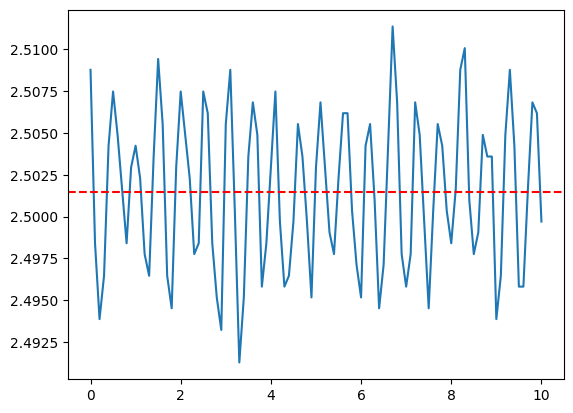

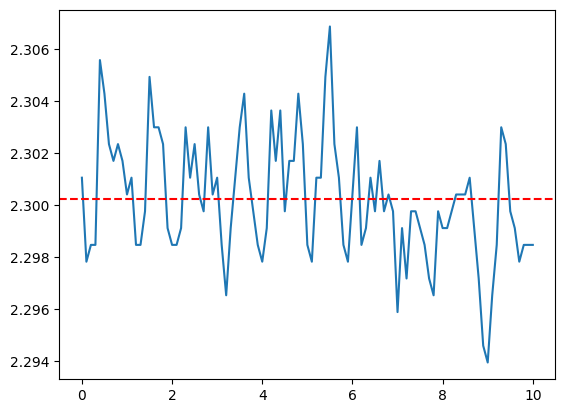

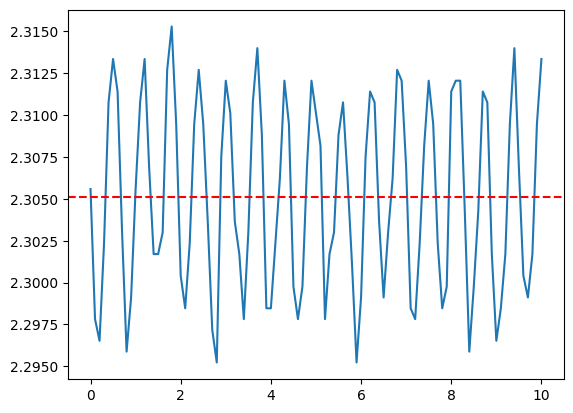

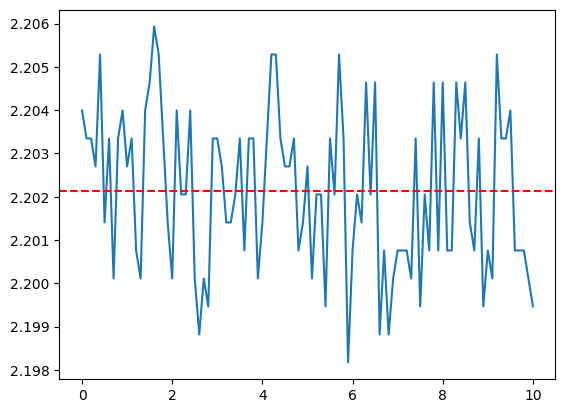

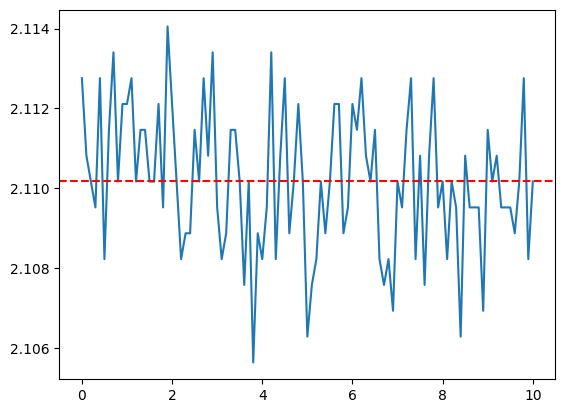

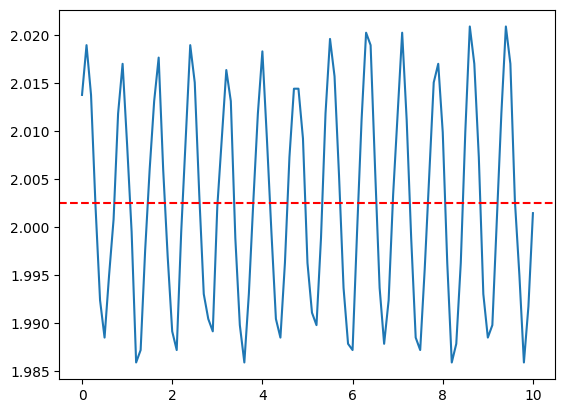

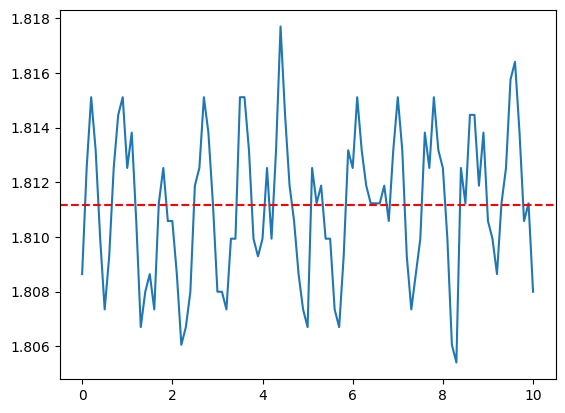

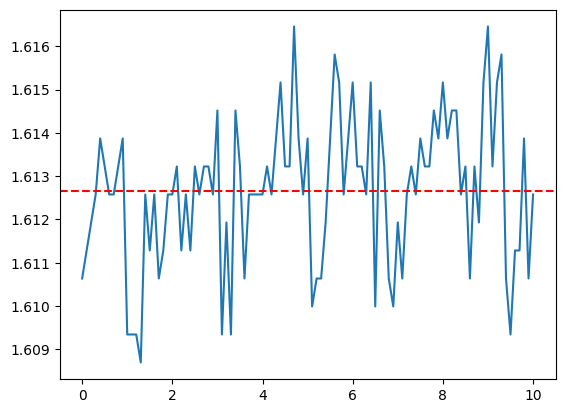

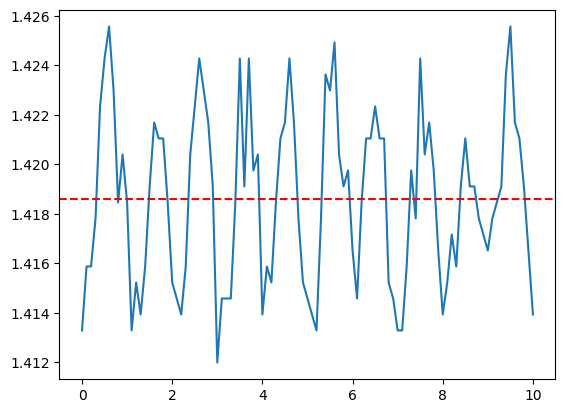

In [89]:
for df_peso in dfs_pesos:
    plt.plot(df_peso['time'], df_peso['(N)'])
    # add mean value
    plt.axhline(y=df_peso['(N)'].mean(), color='r', linestyle='--')
    plt.show()

In [90]:
# 1 A
# medimos la longitud natural del resorte, si esta horizontal nos da 307 mm y si esta en vertical nos da 310 mm
# Como nos interesa saber x_eq - l_0, vamos realizar estadistica para calcular L = x_eq - l_0

l_0 = 0.310
dl_0 = 0.001
dL = 0.001

df.loc[:, 'L'] = df['L'] - l_0

# Anotamos el error en la medida del resorte
df.loc[:, "dL"] = np.sqrt(dl_0**2 + dL**2)
df

M      L        dL
0  0.17486  0.057  0.001414
1  0.26979  0.092  0.001414
2  0.27258  0.093  0.001414
3  0.32518  0.108  0.001414
4  0.37068  0.124  0.001414
5  0.42011  0.145  0.001414
6  0.51783  0.177  0.001414
7  0.61573  0.208  0.001414
8  0.71865  0.242  0.001414

In [91]:
# Calculamos dM, como M es la medida indirecta de la suma de todos los pesos, entonces hay hacer propagacion de errores. este mismo ejemplo estan en el apunte
#http://materias.df.uba.ar/f1qa2021v/files/2020/03/Clase-5-Mediciones-Indirectas.pdf pagina 15

# el error instrumental seria sqrt(numero de pesos) * 0.00001 (error de inst de balanza), como no hicimos varios pesajes el error estadistico es 0

df.loc[:, "dM"] = np.sqrt(np.array([1,2,2,2,3,3,4,5,6])) * 0.00001
df = df[['M', 'dM', 'L', 'dL']]
df

M        dM      L        dL
0  0.17486  0.000010  0.057  0.001414
1  0.26979  0.000014  0.092  0.001414
2  0.27258  0.000014  0.093  0.001414
3  0.32518  0.000014  0.108  0.001414
4  0.37068  0.000017  0.124  0.001414
5  0.42011  0.000017  0.145  0.001414
6  0.51783  0.000020  0.177  0.001414
7  0.61573  0.000022  0.208  0.001414
8  0.71865  0.000024  0.242  0.001414

In [92]:
# haciendo estadistica ya que tenemos muchas mediciones de V en el tiempo nos queda que

df.loc[:, 'V'] = np.nan
df.loc[:, 'dV'] = np.nan

for i, peso in enumerate(dfs_pesos):
    n_samples = len(peso)
    V = peso['(N)'].mean()

    # TODO asumo dV instrmental como 0.01 pero hay que hacer la medida en origin, hay que hacer mucho zoom y ver los saltos entre los voltajes
    dV = np.sqrt((peso['(N)'].std() / np.sqrt(n_samples))**2 + 0.01**2)
    #df['V'].iloc[i] = V
    #df['dV'].iloc[i] = dV
    df.loc[i, 'V'] = V
    df.loc[i, 'dV'] = dV

df

/home/jack/miniconda3/envs/ray113/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jack/miniconda3/envs/ray113/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



M        dM      L        dL         V        dV
0  0.17486  0.000010  0.057  0.001414  2.501489  0.010011
1  0.26979  0.000014  0.092  0.001414  2.300220  0.010003
2  0.27258  0.000014  0.093  0.001414  2.305115  0.010016
3  0.32518  0.000014  0.108  0.001414  2.202142  0.010002
4  0.37068  0.000017  0.124  0.001414  2.110176  0.010002
5  0.42011  0.000017  0.145  0.001414  2.002475  0.010060
6  0.51783  0.000020  0.177  0.001414  1.811149  0.010004
7  0.61573  0.000022  0.208  0.001414  1.612655  0.010001
8  0.71865  0.000024  0.242  0.001414  1.418619  0.010006

In [93]:
def error_relativo(dX, X):
    return dX / X

def mayorErrorRelativo(df, col1, dcol1, col2, dcol2):
    res = []
    erroresRelativos1 = []
    erroresRelativos2 = []

    for index, row in df.iterrows():
        errorRelativoM = error_relativo(row[dcol1], row[col1])
        errorRelativow = error_relativo(row[dcol2], row[col2])

        if errorRelativoM > errorRelativow:
            res.append(col1)
        else:
            res.append(col2)

        erroresRelativos1.append(errorRelativoM)
        erroresRelativos2.append(errorRelativow)

    return (res, erroresRelativos1, erroresRelativos2)

res, erroresRelativosM, erroresRelativosL = mayorErrorRelativo(df, 'M', "dM", "L", 'dL')

print(erroresRelativosM)

print(erroresRelativosL)

print(res)

[5.7188608029280565e-05, 5.241905046047278e-05, 5.188251384448952e-05, 4.3490176590598906e-05, 4.672630861036143e-05, 4.122850699980665e-05, 3.8622714018114054e-05, 3.631572243515486e-05, 3.408459949604367e-05]
[0.024810764252159563, 0.015371886547533638, 0.015206597444871985, 0.013094570021973104, 0.011404948083653992, 0.009753196981883414, 0.007989907132051385, 0.006799103665255264, 0.0058438576957565895]
['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']


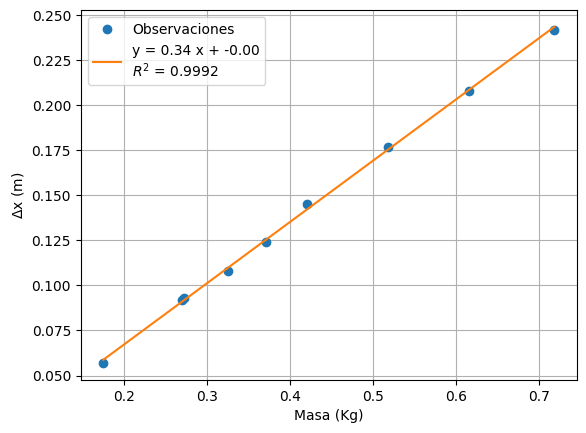

Valor de K = 28.883011878503865 +- 0.23962046704837386


In [94]:
# 2C
def lineal(x, a, b):
    return a * x + b

def fit_with_curve(lineal, x, y, y_err):
    popt, pconv = curve_fit(lineal, x, y, sigma=y_err, absolute_sigma=True)
    return popt[0], popt[1], np.sqrt(pconv.diagonal())[0], np.sqrt(pconv.diagonal())[1]

a, b, da, db = fit_with_curve(lineal, df['M'], df['L'], df['dL'])

R2 = 1 - np.sum((lineal(df['M'], a, b) - df['L'])**2) / np.sum((df['L'] - np.mean(df['L']))**2)

#plt.errorbar(df['M'], df['L'], xerr=df['d_M'], yerr=df['dL'], fmt='o', label='Observaciones Con df')
plt.plot(df['M'], df['L'], 'o', label='Observaciones')

plt.plot(df['M'], lineal(df['M'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

plt.xlabel("Masa (Kg)")
plt.ylabel(r'$\Delta$x (m)')
plt.legend()
plt.grid()
plt.show()

# calculemos K
# TODO si quieren ponemos g de la notebook anterior
g = 9.81
K = g/a
dK = g/a**2 * da
print(f"Valor de K = {K} +- {dK}")

In [95]:

# Si bien para este experiment con M y L ya podriamos calcular K, vamos a hacer una regresion lineal para calclar k_0 y k_1 ya que nos sera de utilidad
# en la parte 2 del tp (medicion dinamina)
# para calcular k_0 y k_1, hay que hacer regrecion lineal para traducir de Voltaje(V) a  Masa (g)
# entonces m = k_1 * V + k_0
# dm = k_1 * dV 

In [96]:
files_periodos = [f for f in mediciones if f.startswith('periodo')]
files_periodos.sort()

# Load all files
dfs_periodos = []
pesos = []
for f in files_periodos:
    peso = pd.read_csv(f'./mediciones/{f}', sep=',', header=0, nrows=1).columns[1]
    pesos.append(float(peso)/1000)
    df = pd.read_csv(f'./mediciones/{f}', sep=',', header=1)
    dfs_periodos.append(df)


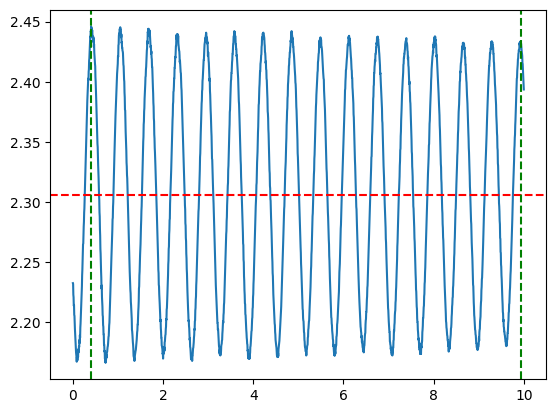

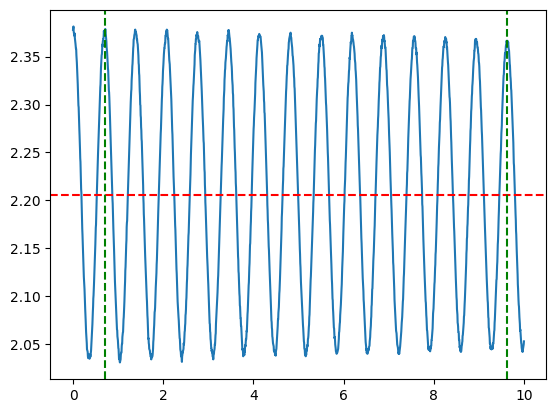

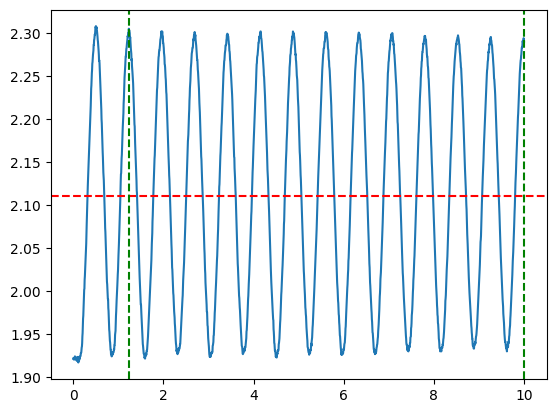

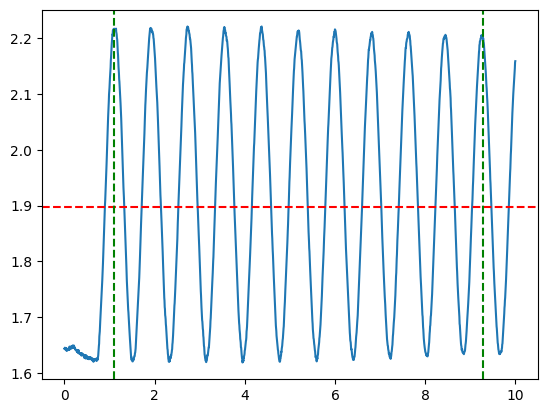

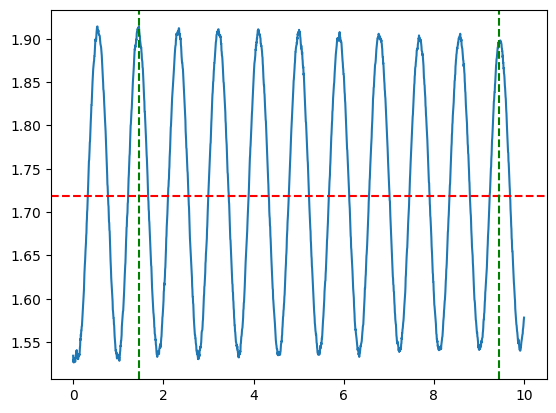

In [97]:
# 1 A
# hay que calcular el prime y ultimo pico y hacer su resta y despues dividir por la #ciclos que es #picos - 1
# para eso primero calculamos los picos del borde y los guardamos

local_maximas_index = []

def find_first_local_maxima(arr):
    rad = 3
    for i in range(rad, len(arr) - rad):
        if arr[i] > arr.mean() and arr[i] > max(arr[i - rad:i]) and arr[i] > max(arr[i + 1:i + rad + 1]):
            return i
    return None

def find_last_local_maxima(arr):
    rad = 3
    for i in range(len(arr) - 2, 0, -1):
        if arr[i] > arr.mean() and arr[i] > max(arr[i - rad:i]) and arr[i] > max(arr[i + 1:i + rad + 1]):
            return i
    return None

for df in dfs_periodos:
    plt.plot(df['time'], df['(N)'])
    plt.axhline(y=df['(N)'].mean(), color='r', linestyle='--')

    arr = df['(N)']
    local_maxima_indices = [find_first_local_maxima(arr), find_last_local_maxima(arr)]
    local_maximas_index.append((find_first_local_maxima(arr), find_last_local_maxima(arr)))
    for i in local_maxima_indices:
        plt.axvline(x=dfs_periodos[0]['time'][i], color='g', linestyle='--')
    plt.show()


In [98]:
# calculamos el tiempo entre los picos graficados: restamos los indices de los picos y multiplicamos por 0.005 que es 1/f y para obtener el tiempo
# luego calculamos el periodo dividiendo por el #ciclos = #picos - 1

periods = []
local_maximas_cicles = [15,13,12,10,9]

for k in range(len(local_maximas_index)):
    periods.append((local_maximas_index[k][1] - local_maximas_index[k][0]) * 0.005 / local_maximas_cicles[k])

periods

[0.635, 0.6861538461538461, 0.7295833333333334, 0.817, 0.8861111111111112]

In [99]:
# Como T = t_f - t_i / (N-1)
dT = np.sqrt(0.005**2 + 0.005**2)

df = pd.DataFrame()

df['T'] = np.array(periods)
df.loc[:, 'dT'] = dT

df['M'] = np.array(pesos)
df.loc[:, "dM"] = np.sqrt(np.array([2,2,3,4,5])) * 0.00001

df['1_M'] = 1/df['M']
df['d_1_M'] = df['dM'] / df['M']**2

df['1_sqrt_M'] = 1/np.sqrt(df['M'])
df['d_1_sqrt_M'] = df['dM'] / (2 * (df['M'])**(3/2))

df['w'] = 2*np.pi / df['T']
df.loc[:, 'dw'] = 2*np.pi / (df['T']**2) * df['dT']

df['w2'] = df['w']**2
df['dw2'] = 2 * df['w'] * df['dw']

df['1_w2'] = 1/df['w']**2
df['d_1_w2'] = df['dw'] / (2 * df['w']**3)

#df['M w2'] = df['M'] * df['w']**2
#df['d_M w2'] = np.sqrt((df['w']**2 * df['dM'])**2 + (2 * df['w'] * df['M'] * df['dw'])**2)

df

T        dT        M        dM       1_M     d_1_M  1_sqrt_M  \
0  0.635000  0.007071  0.27276  0.000014  3.666227  0.000190  1.914739   
1  0.686154  0.007071  0.32518  0.000014  3.075220  0.000134  1.753630   
2  0.729583  0.007071  0.36768  0.000017  2.719756  0.000128  1.649168   
3  0.817000  0.007071  0.46540  0.000020  2.148689  0.000092  1.465841   
4  0.886111  0.007071  0.56033  0.000022  1.784663  0.000071  1.335913   

   d_1_sqrt_M         w        dw         w2       dw2      1_w2    d_1_w2  
0    0.000050  9.894780  0.110184  97.906671  2.180487  0.010214  0.000057  
1    0.000038  9.157109  0.094367  83.852638  1.728265  0.011926  0.000061  
2    0.000039  8.612019  0.083467  74.166866  1.437640  0.013483  0.000065  
3    0.000031  7.690557  0.066561  59.144671  1.023785  0.016908  0.000073  
4    0.000027  7.090742  0.056583  50.278623  0.802436  0.019889  0.000079

In [100]:
res, erroresRelativos1, erroresRelativos2 = mayorErrorRelativo(df, '1_sqrt_M', 'd_1_sqrt_M', 'w', 'dw')
print(erroresRelativos1)
print(erroresRelativos2)
print(res)

[2.592413774697711e-05, 2.1745088295299453e-05, 2.355378056419818e-05, 2.1486892995272885e-05, 1.995313455909723e-05]
[0.011135539861205473, 0.010305367887247889, 0.009691926184167412, 0.008654917762381245, 0.007979888439722794]
['w', 'w', 'w', 'w', 'w']


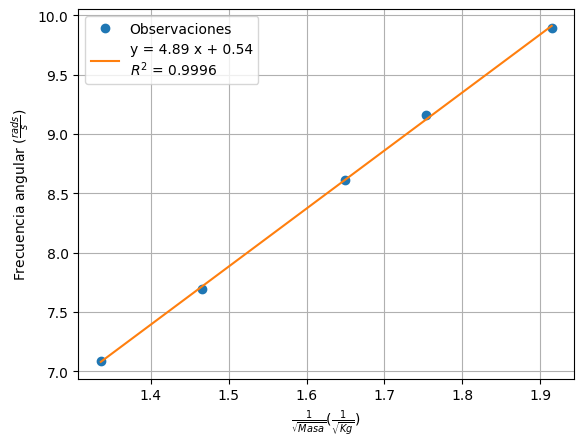

Valor de K = 23.936245554702495 +- 1.715332105682588


In [101]:
# 2C
a, b, da, db = fit_with_curve(lineal, df['1_sqrt_M'], df['w'], df['dw'])

R2 = 1 - np.sum((lineal(df['1_sqrt_M'], a, b) - df['w'])**2) / np.sum((df['w'] - np.mean(df['w']))**2)

#plt.errorbar(df['M'], df['L'], xerr=df['d_M'], yerr=df['dL'], fmt='o', label='Observaciones Con df')
plt.plot(df['1_sqrt_M'], df['w'], 'o', label='Observaciones')

plt.plot(df['1_sqrt_M'], lineal(df['1_sqrt_M'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

plt.xlabel(r'$\frac{1}{\sqrt{Masa}} (\frac{1}{\sqrt{Kg}})$')
plt.ylabel(r'Frecuencia angular ($\frac{rads}{s}$)')
plt.legend()
plt.grid()
plt.show()

# calculemos K
K = a**2
dK = 2*a * da
print(f"Valor de K = {K} +- {dK}")

In [102]:
res, erroresRelativos1, erroresRelativos2 = mayorErrorRelativo(df, '1_M', 'd_1_M', 'w2', 'dw2')
print(erroresRelativos1)
print(erroresRelativos2)
print(res)

[5.184827549395422e-05, 4.34901765905989e-05, 4.710756112839637e-05, 4.297378599054578e-05, 3.990626911819446e-05]
[0.022271079722410946, 0.02061073577449578, 0.019383852368334824, 0.017309835524762493, 0.015959776879445588]
['w2', 'w2', 'w2', 'w2', 'w2']


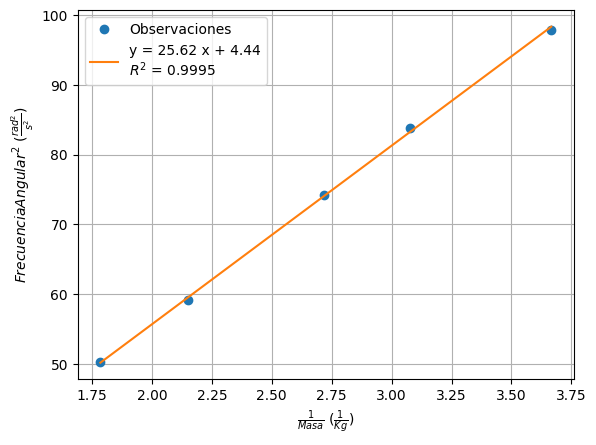

Valor de K = 25.61594505891568 +- 0.9523363481128863


In [103]:
a, b, da, db = fit_with_curve(lineal, df['1_M'], df['w2'], df['dw2'])

R2 = 1 - np.sum((lineal(df['1_M'], a, b) - df['w2'])**2) / np.sum((df['w2'] - np.mean(df['w2']))**2)

#plt.errorbar(df['1_M'], df['L'], xerr=df['d_M'], yerr=df['dL'], fmt='o', label='Observaciones Con df')
plt.plot(df['1_M'], df['w2'], 'o', label='Observaciones')

plt.plot(df['1_M'], lineal(df['1_M'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

plt.xlabel(r'$\frac{1}{Masa}$ ($\frac{1}{Kg}$)')
plt.ylabel(r'${Frecuencia Angular^2}$ ($\frac{rad^2}{s^2}$)')
plt.legend()
plt.grid()
plt.show()

# calculemos K
K = a
dK = da
print(f"Valor de K = {K} +- {dK}")


In [104]:
res, erroresRelativos1, erroresRelativos2 = mayorErrorRelativo(df, 'M', 'dM', '1_w2', 'd_1_w2')
print(erroresRelativos1)
print(erroresRelativos2)
print(res)

[5.184827549395422e-05, 4.3490176590598906e-05, 4.710756112839636e-05, 4.297378599054577e-05, 3.990626911819446e-05]
[0.005567769930602736, 0.0051526839436239445, 0.004845963092083706, 0.004327458881190622, 0.003989944219861396]
['1_w2', '1_w2', '1_w2', '1_w2', '1_w2']


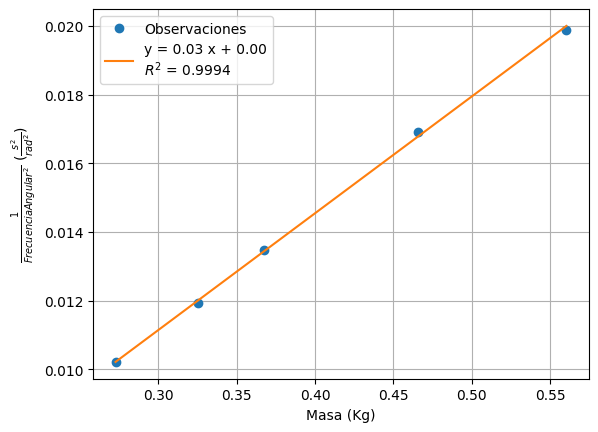

Valor de K = 29.388843922326267 +- 0.2618162091545926


In [105]:
a, b, da, db = fit_with_curve(lineal, df['M'], df['1_w2'], df['d_1_w2'])

R2 = 1 - np.sum((lineal(df['M'], a, b) - df['1_w2'])**2) / np.sum((df['1_w2'] - np.mean(df['1_w2']))**2)

#plt.errorbar(df['M'], df['L'], xerr=df['d_M'], yerr=df['dL'], fmt='o', label='Observaciones Con df')
plt.plot(df['M'], df['1_w2'], 'o', label='Observaciones')

plt.plot(df['M'], lineal(df['M'], a, b), label=f"y = {a:.2f} x + {b:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

plt.xlabel(r'Masa (Kg)')
plt.ylabel(r'$\frac{1}{Frecuencia Angular^2}$ ($\frac{s^2}{rad^2}$)')
plt.legend()
plt.grid()
plt.show()

# calculemos K
K = 1/a
dK = 1/a**2 * da
print(f"Valor de K = {K} +- {dK}")


# Parte 2: Amortiguado

In [106]:
# Load all files in ./mediciones directory
mediciones = os.listdir('./mediciones/amortiguado')
files_amort = [f for f in mediciones if f.startswith('resortecalibrado')]
files_amort.sort()

# Load all files
dfs_amort = []
df = pd.DataFrame(columns=['M', 'L'])

for f in files_amort:
    # peso = pd.read_csv(f'./mediciones/amortiguado/{f}', sep=',', header=0, nrows=0).columns[1]
    # distancia = pd.read_csv(f'./mediciones/amortiguado/{f}', sep=',', header=1, nrows=0).columns[1]
    # temp_df = pd.DataFrame({'M': float(peso)/1000,
    #                              'L': float(distancia)/1000}, index=[0])
    # df = pd.concat([df, temp_df], ignore_index=True)

    dfs_amort.append(pd.read_csv(f'./mediciones/amortiguado/{f}', sep=',', header=0))



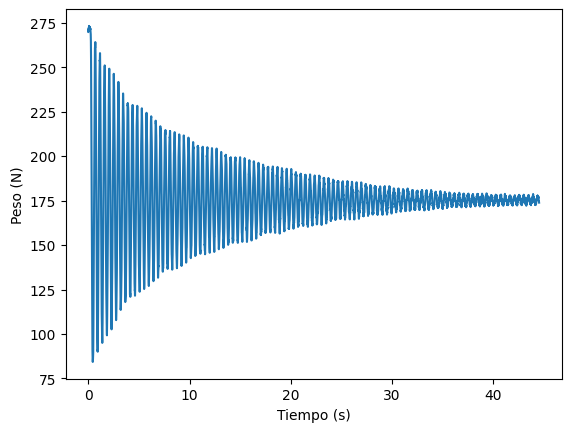

In [107]:
plt.plot(dfs_amort[0]['time'], dfs_amort[0]['(N)'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Peso (N)')
plt.show()


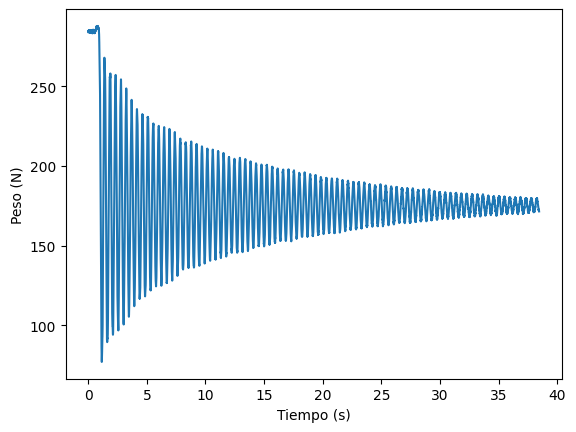

In [108]:
plt.plot(dfs_amort[1]['time'], dfs_amort[1]['(N)'])
plt.xlabel('Tiempo (s)')
plt.ylabel('Peso (N)')
plt.show()

In [109]:
dfs_amort[0]

time       (N)
0      0.000  270.5855
1      0.005  269.6783
2      0.010  270.0574
3      0.015  270.2064
4      0.020  270.6532
...      ...       ...
8898  44.490  174.7893
8899  44.495  174.5997
8900  44.500  174.2341
8901  44.505  174.1935
8902  44.510  173.8279

[8903 rows x 2 columns]

In [110]:
dfs_amort[1]

time       (N)
0      0.000  284.6672
1      0.005  284.3287
2      0.010  283.8548
3      0.015  284.0173
4      0.020  284.4370
...      ...       ...
7685  38.425  172.5687
7686  38.430  171.7834
7687  38.435  172.1219
7688  38.440  171.5667
7689  38.445  171.5261

[7690 rows x 2 columns]

### Fit general

Intento de fit de toda la función sinusoidal con amplitud dada por una función exponencial (comparar con próximo método usando solo los máximos)

In [131]:
# Fit sin function to the data
from scipy.optimize import curve_fit

def Amp(A, lamb, t):
    return A * np.exp(-lamb * t)

def sin(t, A, lamb, w, phi, F0):
    return Amp(A, lamb, t) * np.sin(w * t + phi) + F0

# Fit the sin function to the data
p0 = {'A': 95,
      'lamb': 1,
      'w': 15,
      'phi': 0,
      'F0': 175}

# Set bounds for the parameters as dictionary to zip later
p0_bounds = ([90, 0, -2, -np.pi, 150],
             [100, 1, 4, np.pi, 200])

# Range to fit and to plot
rango = range(50, 6000)

# NO considero los primeros 50 puntos
popt, pcov = curve_fit(sin, 
                       dfs_amort[0]['time'][rango], 
                       dfs_amort[0]['(N)'][rango],
                       p0=list(p0.values()),
                       #sigma=y_err,
                       absolute_sigma=True)
                      #method='trf', maxfev=10000, bounds=p0_bounds)

# Plot the data and the fit using plotly
x = np.linspace(0, 30, 3000)
y = sin(x, *popt)

fig = px.line(x=x, y=y, title='Fit sin function to the data')
# Add the data to the plot with pointy lines
fig.add_scatter(x=dfs_amort[0]['time'][rango],
                y=dfs_amort[0]['(N)'][rango],
                mode='markers', name="Mediciones", marker=dict(size=3))
fig.show()

print("A: ", popt[0])
print("lambda: ", popt[1])
print("w: ", popt[2])
print("phi: ", popt[3])
print("F0: ", popt[4])


A:  85.10501552942435
lambda:  0.09053800525930447
w:  13.632427603903057
phi:  3.1709576678971576
F0:  175.27500798880527


# NOTA:

* Fittear todo junto parece que no funciona muy bien: Sospecho que es por la cola y que no hay forma de que un decaimiento exponencial quede bien ahí.
* Para buscar todos los picos de cada oscilacion:
  1. Centrar los puntos en cero restando la media de la cola
  2. Encontrar todos los valores donde se cruza el eje x (cuando dos puntos consecutivos tienen distinto signo)
  3. Cada pico va a estar entre dos cambios de signo, intercalando los correctos se obtienen los máximos


* Hay algunis puntos flojos en este analisis que deben ser considerados al implementarlo: la cola que se toma para que la función tenga media = 0, los puntos que definen el pico no necesariamente son el pico y hasta puede estar formado por varios.

* Posible solución: Ajustar un seno a cada oscilación positiva por separado para tener una mejor estimación del maximo de ese ciclo.
  * Ésto tiene el problema que es difícil propagar el error después (creo), pero haciéndolo a ojo como en los puntos anteriores capaz también es engorroso estimar el error del máximo elegido


<AxesSubplot:>

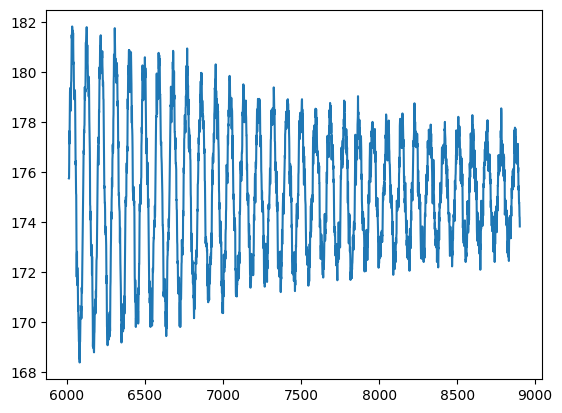

In [112]:
dfs_amort[0].loc[6012:, '(N)'].plot()

In [113]:
centro_señal = dfs_amort[0].loc[6012:, '(N)'].mean()
print("Centro aproximado de la curva:", round(centro_señal, 2))

Centro aproximado de la curva: 175.22


Se traslada la función para tener como centro el eje x, luego se vuelve a trasladar a su posición original

In [114]:
new_df = dfs_amort[0].iloc[70:].copy()
new_df['(N)'] = new_df['(N)'] - centro_señal
new_df

time        (N)
70     0.350  -4.808684
71     0.355 -10.725684
72     0.360 -15.938684
73     0.365 -20.637084
74     0.370 -27.231084
...      ...        ...
8898  44.490  -0.435184
8899  44.495  -0.624784
8900  44.500  -0.990384
8901  44.505  -1.030984
8902  44.510  -1.396584

[8833 rows x 2 columns]

In [115]:
fig = px.line(new_df, x='time', y='(N)', title='Peso vs Tiempo (centrado en cero)')
fig.show()

In [116]:
new_df["sign"] = 2*(new_df["(N)"] > 0) - 1
new_df

time        (N)  sign
70     0.350  -4.808684    -1
71     0.355 -10.725684    -1
72     0.360 -15.938684    -1
73     0.365 -20.637084    -1
74     0.370 -27.231084    -1
...      ...        ...   ...
8898  44.490  -0.435184    -1
8899  44.495  -0.624784    -1
8900  44.500  -0.990384    -1
8901  44.505  -1.030984    -1
8902  44.510  -1.396584    -1

[8833 rows x 3 columns]

In [117]:
fig = px.line(new_df, x='time', y='sign', title='Signo de la curva')
fig.add_scatter(x=new_df['time'],
                y=new_df['(N)']/100,
                mode='markers', name="Mediciones", marker=dict(size=3))
fig.show()

In [118]:
new_df["cycle_start"] = (new_df["sign"].shift(1) == -1) & (new_df["sign"] == 1)
new_df["cycle_id"] = new_df["cycle_start"].cumsum()
new_df

time        (N)  sign  cycle_start  cycle_id
70     0.350  -4.808684    -1        False         0
71     0.355 -10.725684    -1        False         0
72     0.360 -15.938684    -1        False         0
73     0.365 -20.637084    -1        False         0
74     0.370 -27.231084    -1        False         0
...      ...        ...   ...          ...       ...
8898  44.490  -0.435184    -1        False       124
8899  44.495  -0.624784    -1        False       124
8900  44.500  -0.990384    -1        False       124
8901  44.505  -1.030984    -1        False       124
8902  44.510  -1.396584    -1        False       124

[8833 rows x 5 columns]

In [119]:
print(new_df[new_df["cycle_start"] == True])

        time       (N)  sign  cycle_start  cycle_id
116    0.580  2.516516     1         True         1
208    1.040  1.907216     1         True         2
300    1.500  1.568716     1         True         3
392    1.960  1.853016     1         True         4
484    2.420  3.599716     1         True         5
...      ...       ...   ...          ...       ...
8624  43.120  0.417816     1         True       120
8668  43.340  0.025116     1         True       121
8761  43.805  0.255316     1         True       122
8850  44.250  0.133416     1         True       123
8853  44.265  0.593816     1         True       124

[124 rows x 5 columns]


In [120]:
positive_cycles = new_df[new_df["sign"] == 1]
negative_cycles = new_df[new_df["sign"] == -1]

In [121]:
idx_max_force = positive_cycles.groupby("cycle_id")["(N)"].idxmax()
max_per_cycle = new_df.loc[idx_max_force, ["time","(N)"]]#.reset_index(drop=True)

idx_min_force = negative_cycles.groupby("cycle_id")["(N)"].idxmin()
min_per_cycle = new_df.loc[idx_min_force, ["time","(N)"]]#.reset_index(drop=True)

max_per_cycle

time        (N)
140    0.700  88.848216
233    1.165  82.633316
325    1.625  75.741416
416    2.080  73.886416
505    2.525  71.015916
...      ...        ...
8624  43.120   0.417816
8695  43.475   2.855016
8783  43.915   3.328916
8850  44.250   0.133416
8871  44.355   2.557116

[124 rows x 2 columns]

#### Observación:

Notar que en el siguiente gráfico, varios puntos son considerados maximos o mínimos erroneamente.

Hacer zoom para ver la causa.

In [122]:
fig = px.line(new_df, x='time', y='(N)', title='Peso vs Tiempo (centrado en cero)')

fig.add_scatter(x=max_per_cycle['time'],
                y=max_per_cycle['(N)'],
                mode='markers', name="Máximos", marker=dict(size=10))

fig.add_scatter(x=min_per_cycle['time'],
                y=min_per_cycle['(N)'],
                mode='markers', name="Mínimos", marker=dict(size=10))

fig.show()

Eliminamos puntos que no son verdaderos mínimos/máximos

In [123]:
signal_threshold = 1.5 # Valores por debajo son ignorados
max_per_cycle = max_per_cycle[max_per_cycle["(N)"] > signal_threshold]
min_per_cycle = min_per_cycle[min_per_cycle["(N)"] < -signal_threshold]

In [124]:
fig = px.line(new_df, x='time', y='(N)', title='Peso vs Tiempo (centrado en cero)')

fig.add_scatter(x=max_per_cycle['time'],
                y=max_per_cycle['(N)'],
                mode='markers', name="Máximos", marker=dict(size=10))

fig.add_scatter(x=min_per_cycle['time'],
                y=min_per_cycle['(N)'],
                mode='markers', name="Mínimos", marker=dict(size=10))

fig.show()

Traslado nuevamente la señal a su posición original

In [125]:
new_df["(N)"] = new_df["(N)"] + centro_señal
max_per_cycle["(N)"] = max_per_cycle["(N)"] + centro_señal
min_per_cycle["(N)"] = min_per_cycle["(N)"] + centro_señal

/tmp/ipykernel_167522/3381021749.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Ajuste de función exponencial

In [126]:
def Amp(t, A, lamb, F0):
    return A * np.exp(-lamb * t) + F0

p0_max = {'A': 95,
          'lamb': 1,
          'F0': 0
         }

p0_min = p0_max.copy()
p0_min['A'] *= -1

popt_max, pcov_max = curve_fit(Amp, 
            max_per_cycle['time'], 
            max_per_cycle['(N)'],
            p0=list(p0_max.values()),
            #sigma=y_err,
            absolute_sigma=True)

popt_min, pcov_min = curve_fit(Amp, 
            min_per_cycle['time'], 
            min_per_cycle['(N)'],
            p0=list(p0_min.values()),
            #sigma=y_err,
            absolute_sigma=True)

print("Max values")
print("A: ", popt_max[0])
print("lambda: ", popt_max[1])
print("F0: ", popt_max[2])
print()
print("Min values")
print("A: ", popt_min[0])
print("lambda: ", popt_min[1])
print("F0: ", popt_min[2])

Max values
A:  84.5904017623281
lambda:  0.09608890121679764
F0:  177.62844081424961

Min values
A:  -85.25743823571987
lambda:  0.09829507128050148
F0:  172.54271803921887


In [127]:
# Plot the data and the fit using plotly
t = np.linspace(0, 45, 1000)
y_max = Amp(t, *popt_max)
y_min = Amp(t, *popt_min)

fig = px.scatter(data_frame=pd.DataFrame(), title='Decaimiento exponencial')

fig.add_scatter(x=t,
                y=y_max,
                mode='lines', name="Decay Max", marker=dict(size=3))

fig.add_scatter(x=t,
                y=y_min,
                mode='lines', name="Decay Min", marker=dict(size=3))

fig.add_scatter(x=max_per_cycle['time'],
                y=max_per_cycle['(N)'],
                mode='markers', name="Máximos", marker=dict(size=5))

fig.add_scatter(x=min_per_cycle['time'],
                y=min_per_cycle['(N)'],
                mode='markers', name="Mínimos", marker=dict(size=5))

fig.add_scatter(x=new_df['time'],
                y=new_df['(N)'],
                mode='lines', name="Mediciones", marker=dict(size=5))

fig.show()

### Método de Linealización

Ajustamos la función lineal transformada a partir de:

$$A_{maxs} (t) = A e^{-\lambda t} + F_0$$

como

$$\ln(A_{maxs} - F_0) = \ln(A) - \lambda t$$

donde:

* y = $\ln(A_{max} - F_0)$
* a = $- \lambda$ (pendiente)
* b = $\ln(A)$

$$y = a t + b$$

In [128]:
df_lineal_max = max_per_cycle.copy()
df_lineal_max["y"] = np.log(df_lineal_max["(N)"] - centro_señal)

df_lineal_min = min_per_cycle.copy()
df_lineal_min["y"] = np.log(-1 * (df_lineal_min["(N)"] - centro_señal)) # Espejo la señal para que no sea negativa

In [129]:
def f_lineal(t, a, b):
    return a*t + b

# No necesita valores iniciales pues es función lineal, con ÚNICO minimo global y local

popt_max, pcov_max = curve_fit(f_lineal, 
            df_lineal_max['time'], 
            df_lineal_max['y'],
            #sigma=y_err,
            absolute_sigma=True)

popt_min, pcov_min = curve_fit(f_lineal, 
            df_lineal_min['time'], 
            df_lineal_min['y'],
            #sigma=y_err,
            absolute_sigma=True)


# Transformo los parámetros nuevamenta a su forma no linealizada
a_max, b_max = popt_max
A_max = np.exp(b_max)
lambda_max = -1 * a_max

print("Usando Max values")
print("A_max: ", A_max)
print("lambda_max: ", lambda_max)
print()

a_min, b_min = popt_min
A_min = np.exp(b_min)
lambda_min = -1 * a_min

print("Usando Min values")
print("A_min: ", A_min)
print("lambda_min: ", lambda_min)


Usando Max values
A_max:  78.58380867770273
lambda_max:  0.07931922240655336

Usando Min values
A_min:  78.90958740382293
lambda_min:  0.07954893341348096
